In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.insert(0, "../")

# Simulation Results and PRFM Theory

In [3]:
import matplotlib.pyplot as plt
import prfm

plt.rcParams["figure.dpi"] = 200

In [4]:
data = prfm.simulations.load_sim_data()

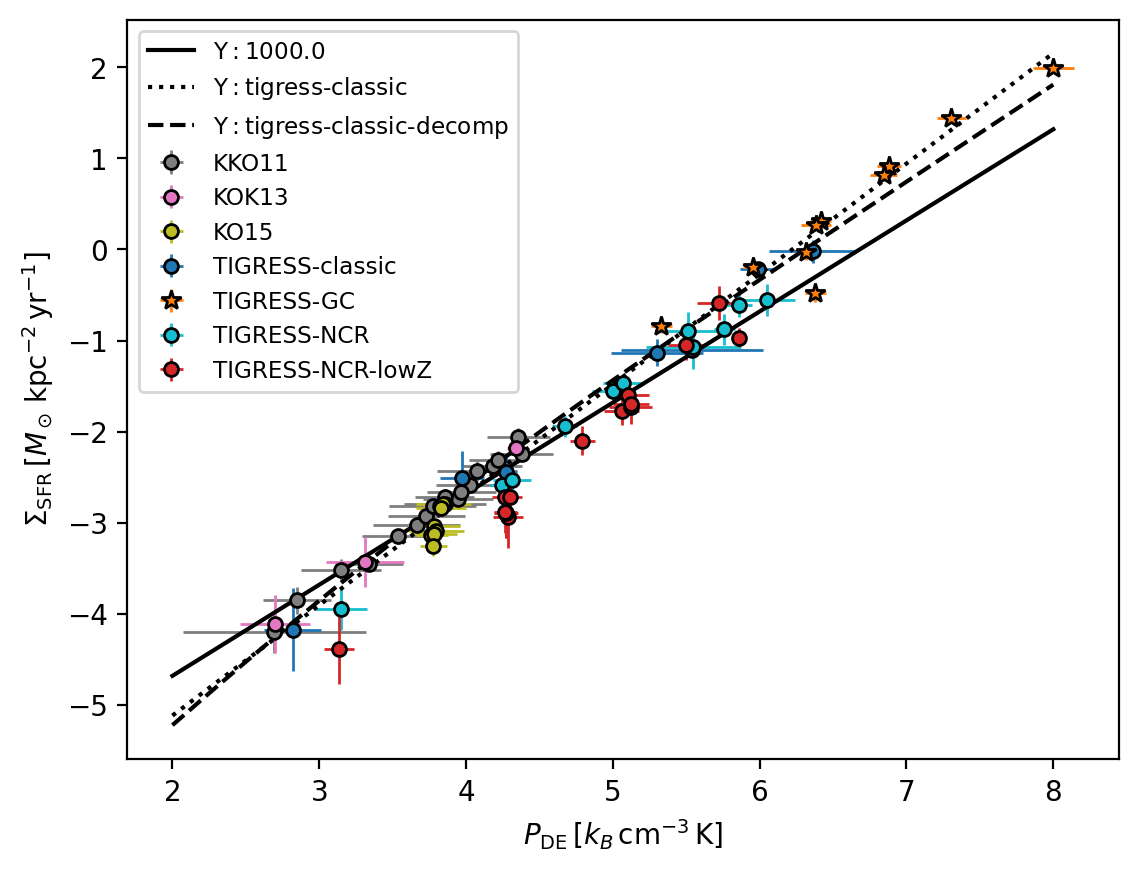

In [5]:
# all simulations
for i, (k, d) in enumerate(data.items()):
    p = prfm.sims.add_one_sim(d)

# P_SFR
prfm.sims.add_PSFR_model_lines(Wmin=2, Wmax=8)
plt.legend(fontsize="small")

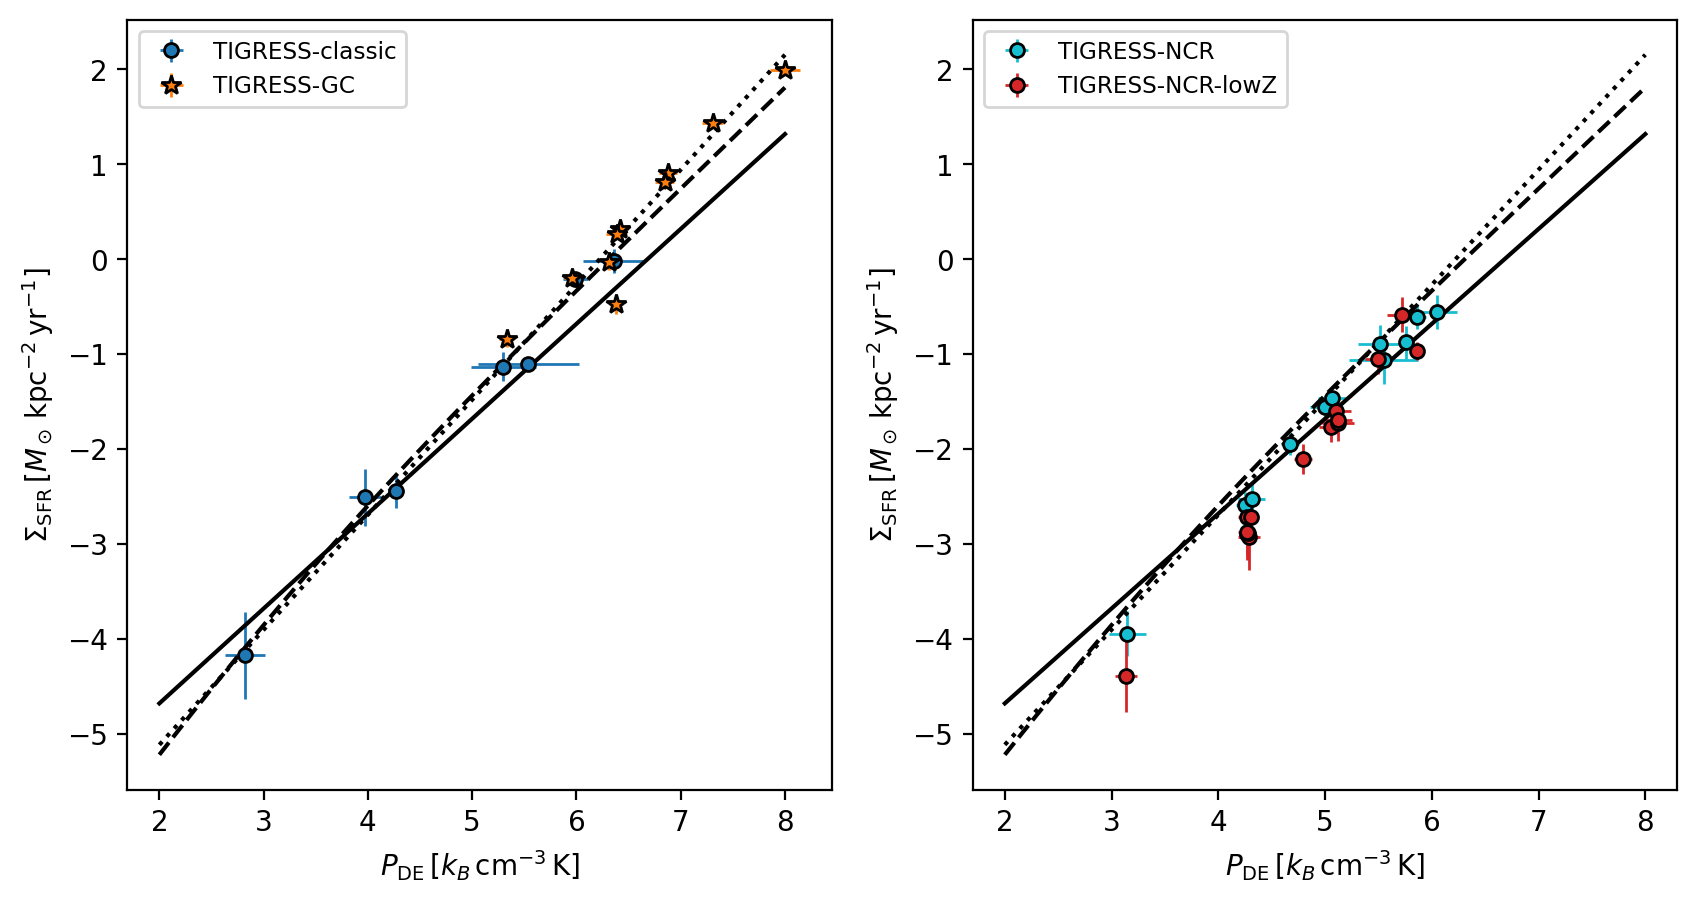

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

for ax, mlist in zip(
    axes, [["TIGRESS-classic", "TIGRESS-GC"], ["TIGRESS-NCR", "TIGRESS-NCR-lowZ"]]
):
    plt.sca(ax)
    for i, k in enumerate(mlist):
        d = data[k]
        p = prfm.sims.add_one_sim(d)
    plt.legend(fontsize="small")
    prfm.sims.add_PSFR_model_lines(Wmin=2, Wmax=8)

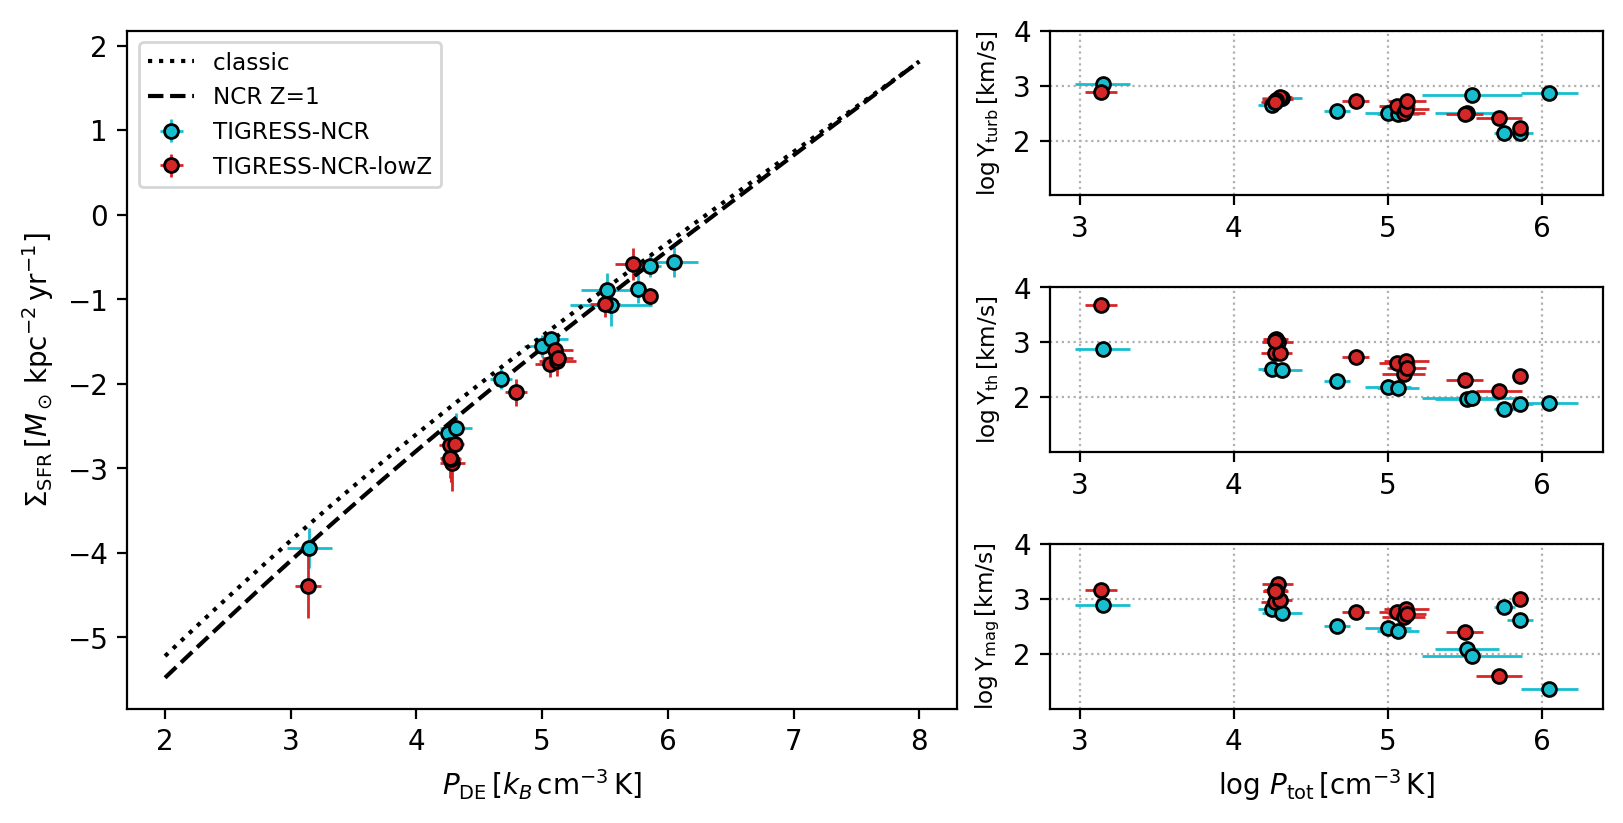

In [7]:
fig, main_ax, side_axes = prfm.sims.setup_axes(figsize=(8, 4), width_ratios=(1.5, 1))
for k in ["TIGRESS-NCR", "TIGRESS-NCR-lowZ"]:
    d = data[k]
    plt.sca(main_ax)
    prfm.sims.add_one_sim(d, xf="Ptot", yf="SFR")
    for ax, yf in zip(side_axes, ["Y_Pturb", "Y_Pth", "Y_Pimag"]):
        plt.sca(ax)
        prfm.sims.add_one_sim(d, yf=yf)
        plt.ylim(1, 4)
        plt.yticks([2, 3, 4])
        plt.ylabel(
            r"$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$".format(
                yf[2:].replace("Pi", "P")[1:]
            ),
            fontsize="small",
        )
        plt.grid("on", ls=":")
    plt.xlabel(r"$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$")
plt.sca(main_ax)
prfm.sims.add_PSFR_model_line(
    model="tigress-classic-decomp", ls=":", color="k", label="classic "
)
prfm.sims.add_PSFR_model_line(
    model="tigress-ncr-decomp", ls="--", color="k", label="NCR Z=1"
)
plt.legend(fontsize="small")

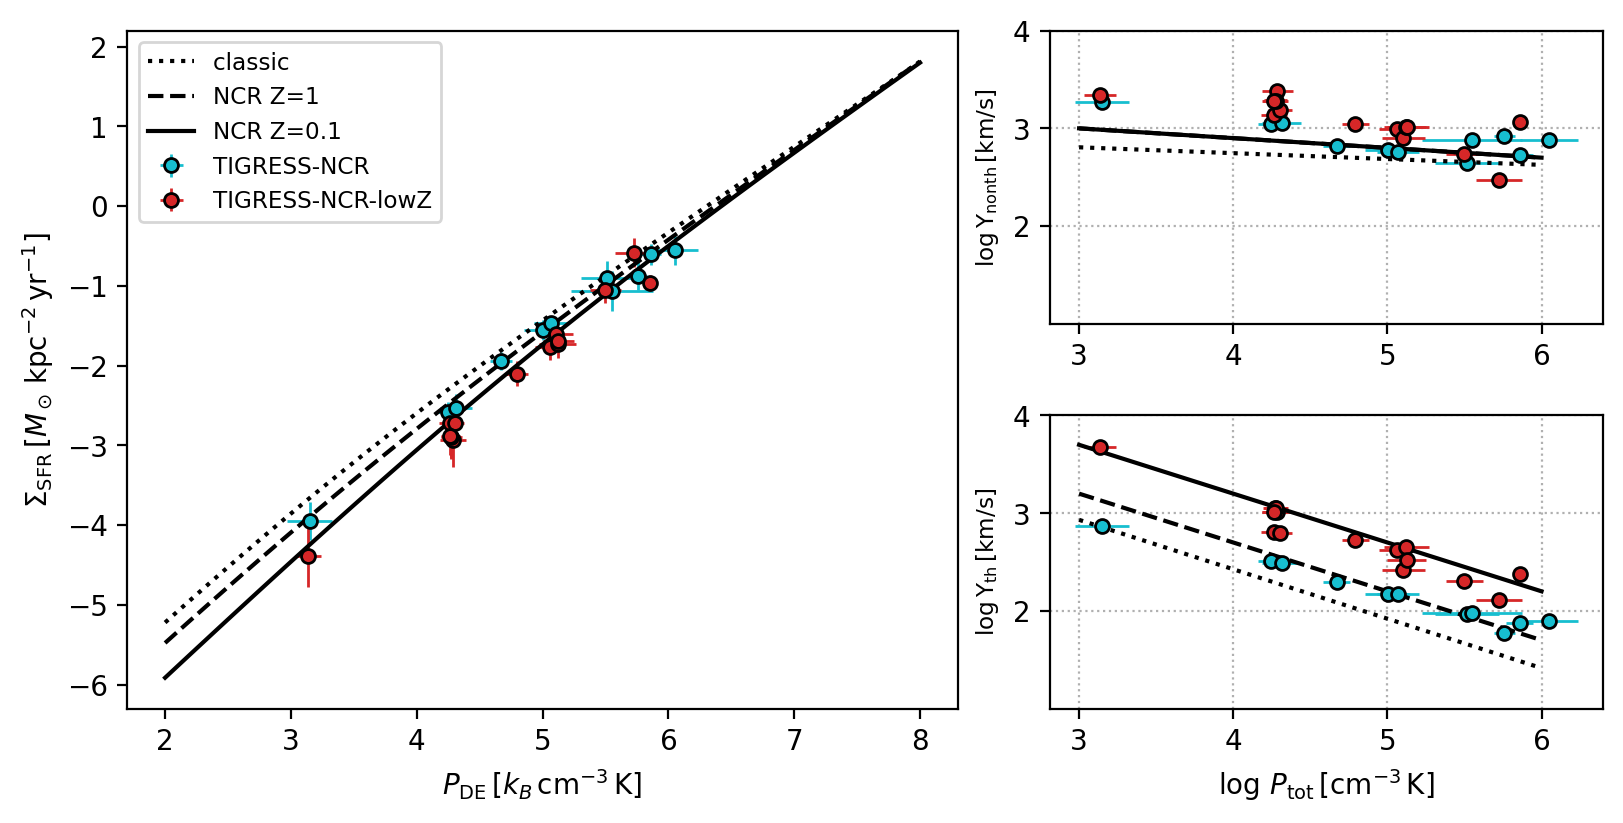

In [8]:
fig, main_ax, side_axes = prfm.sims.setup_axes(
    nrow=2, figsize=(8, 4), width_ratios=(1.5, 1)
)
for k in ["TIGRESS-NCR", "TIGRESS-NCR-lowZ"]:
    d = data[k]
    plt.sca(main_ax)
    prfm.sims.add_one_sim(d, xf="Ptot", yf="SFR")
    for ax, yf in zip(side_axes, ["Y_Pnonth", "Y_Pth"]):
        plt.sca(ax)
        prfm.sims.add_one_sim(d, yf=yf)
        plt.ylim(1, 4)
        plt.yticks([2, 3, 4])
        plt.ylabel(
            r"$\log \Upsilon_{{\rm {}}}\,[{{\rm km/s}}]$".format(
                yf[2:].replace("Pi", "P")[1:]
            ),
            fontsize="small",
        )
        plt.grid("on", ls=":")
    plt.xlabel(r"$\log\,P_{\rm tot}\,[{\rm cm^{-3}\,K}]$")
plt.sca(main_ax)
prfm.sims.add_PSFR_model_line(
    model="tigress-classic-decomp", ls=":", color="k", label="classic "
)
prfm.sims.add_PSFR_model_line(
    model="tigress-ncr-decomp", ls="--", color="k", label="NCR Z=1"
)
prfm.sims.add_PSFR_model_line(
    model="tigress-ncr-decomp-Z01", ls="-", color="k", label="NCR Z=0.1"
)

plt.legend(fontsize="small")
for ax, yf in zip(side_axes, ["trb", "th"]):
    plt.sca(ax)
    prfm.sims.add_yield_model_lines(Wmin=3, Wmax=6, comp=yf)